# Non binary classification using a pretrained model by applying transfer learning

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

We first make a call to tf.keras.applications.mobilenet.MobileNet() to obtain a copy of a single pretrained MobileNet model with weights that were saved from being trained on ImageNet images. We're assigning this model to the variable mobile.

In [2]:
mobile = tf.keras.applications.mobilenet.MobileNet()

17235968/17225924 [==============================] - 4s 0us/step


Next, we will need a function  prepare_image() that accepts an image file, and processes the image to get it in a format that the model expects. We'll be passing each of our images to this function before we use MobileNet to predict on it.

In [33]:
def prepare_image(file):
    img_path = 'C:/Users/91939/test2/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

Above is the function that loads the image from the given path, and creates an instance of image after a resizing to (224,224)
which is the required size for MobileNet model.I have set the relative path which is in my folder as img_path. We then convert the image to the array and change the dimensions as per the requirement 

In [28]:
from IPython.display import Image

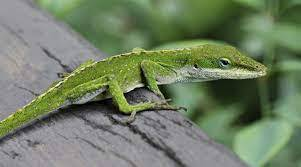

In [29]:
Image(filename='C:/Users/91939/test2/1.JPG', width=300,height=200) 

We're going to process this image by passing it to our prepare_image() function and assign the result to this preprocessed_image variable. We're then having MobileNet predict on this image by calling mobile.predict() and passing it our preprocessed_image.

In [52]:
preprocessed_image = prepare_image('1.JPG')
predictions = mobile.predict(preprocessed_image)

Then, we're using an ImageNet utility function provided by Keras called decode_predictions(). It returns the top five ImageNet class predictions with the ImageNet class ID, the class label, and the probability. With this, we'll be able to see the five ImageNet classes with the highest prediction probabilities from our model on this given image. Recall that there are 1000 total ImageNet classes.

In [42]:
results = imagenet_utils.decode_predictions(predictions)
predicted_name =  results[0][0][1]
predicted_name

'American_chameleon'

# Some  more predictions

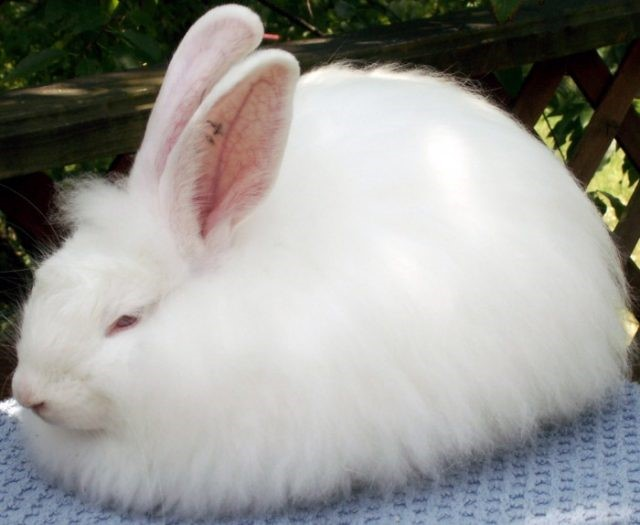

In [59]:
Image(filename='C:/Users/91939/test2/2.JPG', width=300,height=200) 

In [61]:
preprocessed_image = prepare_image('2.JPG')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
predicted_name =  results[0][0][1]
predicted_name

'Angora'

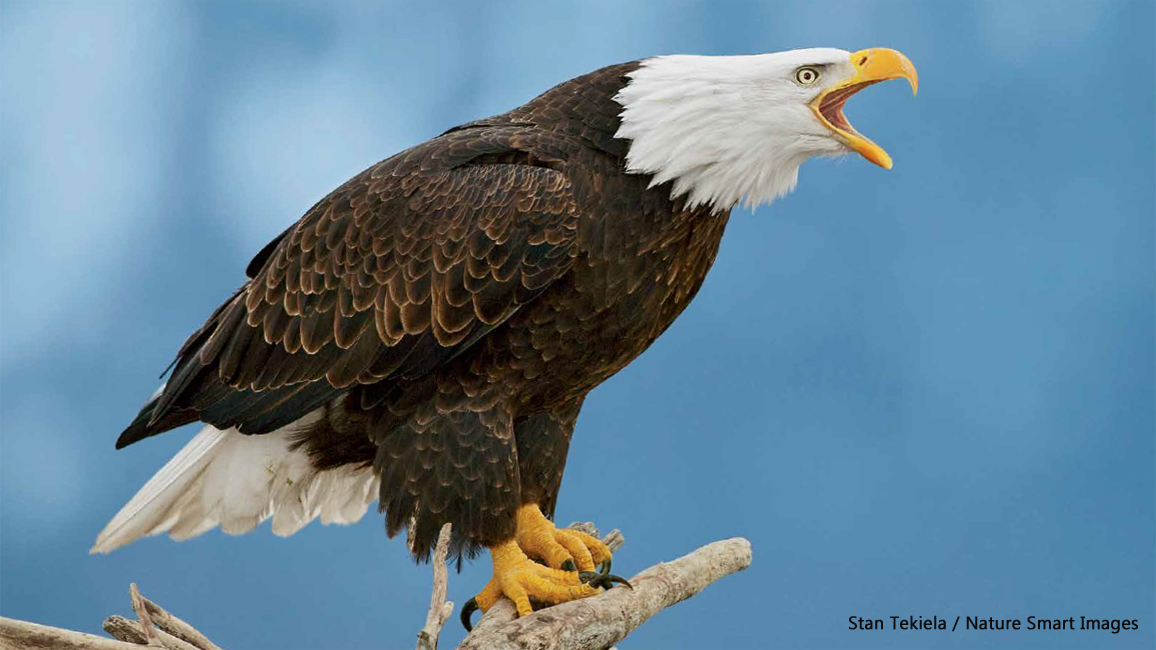

In [62]:
Image(filename='C:/Users/91939/test2/3.JPG', width=300,height=200) 

In [63]:
preprocessed_image = prepare_image('3.JPG')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
predicted_name =  results[0][0][1]
predicted_name

'bald_eagle'

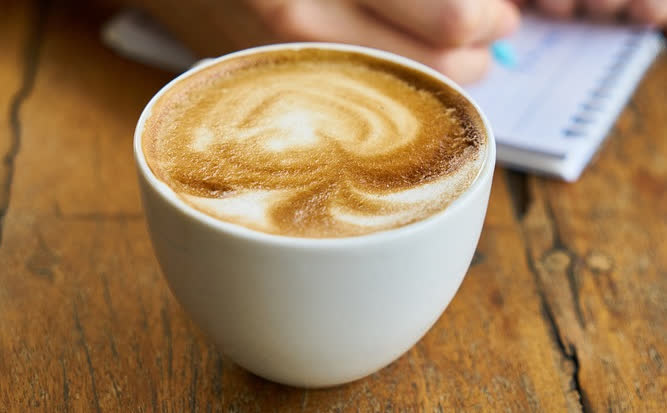

In [82]:
Image(filename='C:/Users/91939/test2/4.JPG', width=300,height=200) 

In [83]:
preprocessed_image = prepare_image('4.JPG')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
predicted_name =  results[0][0][1]
predicted_name

'espresso'

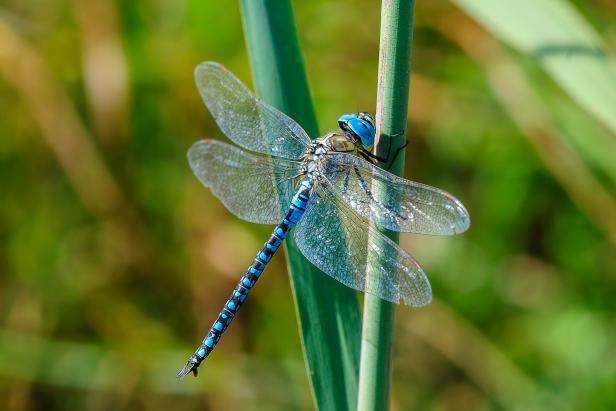

In [69]:
Image(filename='C:/Users/91939/test2/5.JPEG', width=300,height=200) 

In [71]:
preprocessed_image = prepare_image('5.JPEG')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
predicted_name =  results[0][0][1]
predicted_name

'dragonfly'

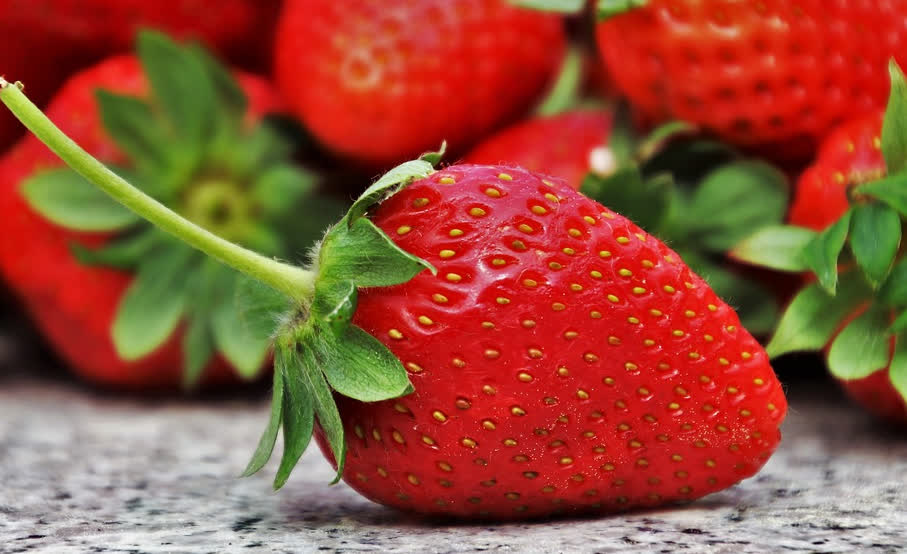

In [84]:
Image(filename='C:/Users/91939/test2/6.JPG', width=300,height=200) 

In [85]:
preprocessed_image = prepare_image('6.JPG')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
predicted_name =  results[0][0][1]
predicted_name

'strawberry'

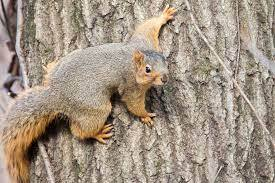

In [77]:
Image(filename='C:/Users/91939/test2/7.JPG', width=300,height=200) 

In [78]:
preprocessed_image = prepare_image('7.JPG')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
predicted_name =  results[0][0][1]
predicted_name

'fox_squirrel'

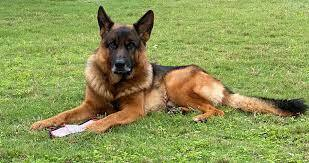

In [79]:
Image(filename='C:/Users/91939/test2/8.JPG', width=300,height=200) 

In [81]:
preprocessed_image = prepare_image('8.JPG')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
predicted_name =  results[0][0][1]
predicted_name

'malinois'

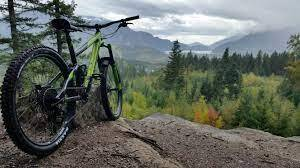

In [87]:
Image(filename='C:/Users/91939/test2/11.JPG', width=300,height=200) 

In [89]:
preprocessed_image = prepare_image('11.JPG')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
predicted_name =  results[0][0][1]
predicted_name

'mountain_bike'

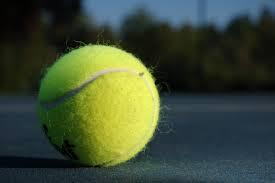

In [90]:
Image(filename='C:/Users/91939/test2/17.JPG', width=300,height=200) 

In [91]:
preprocessed_image = prepare_image('17.JPG')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
predicted_name =  results[0][0][1]
predicted_name

'tennis_ball'

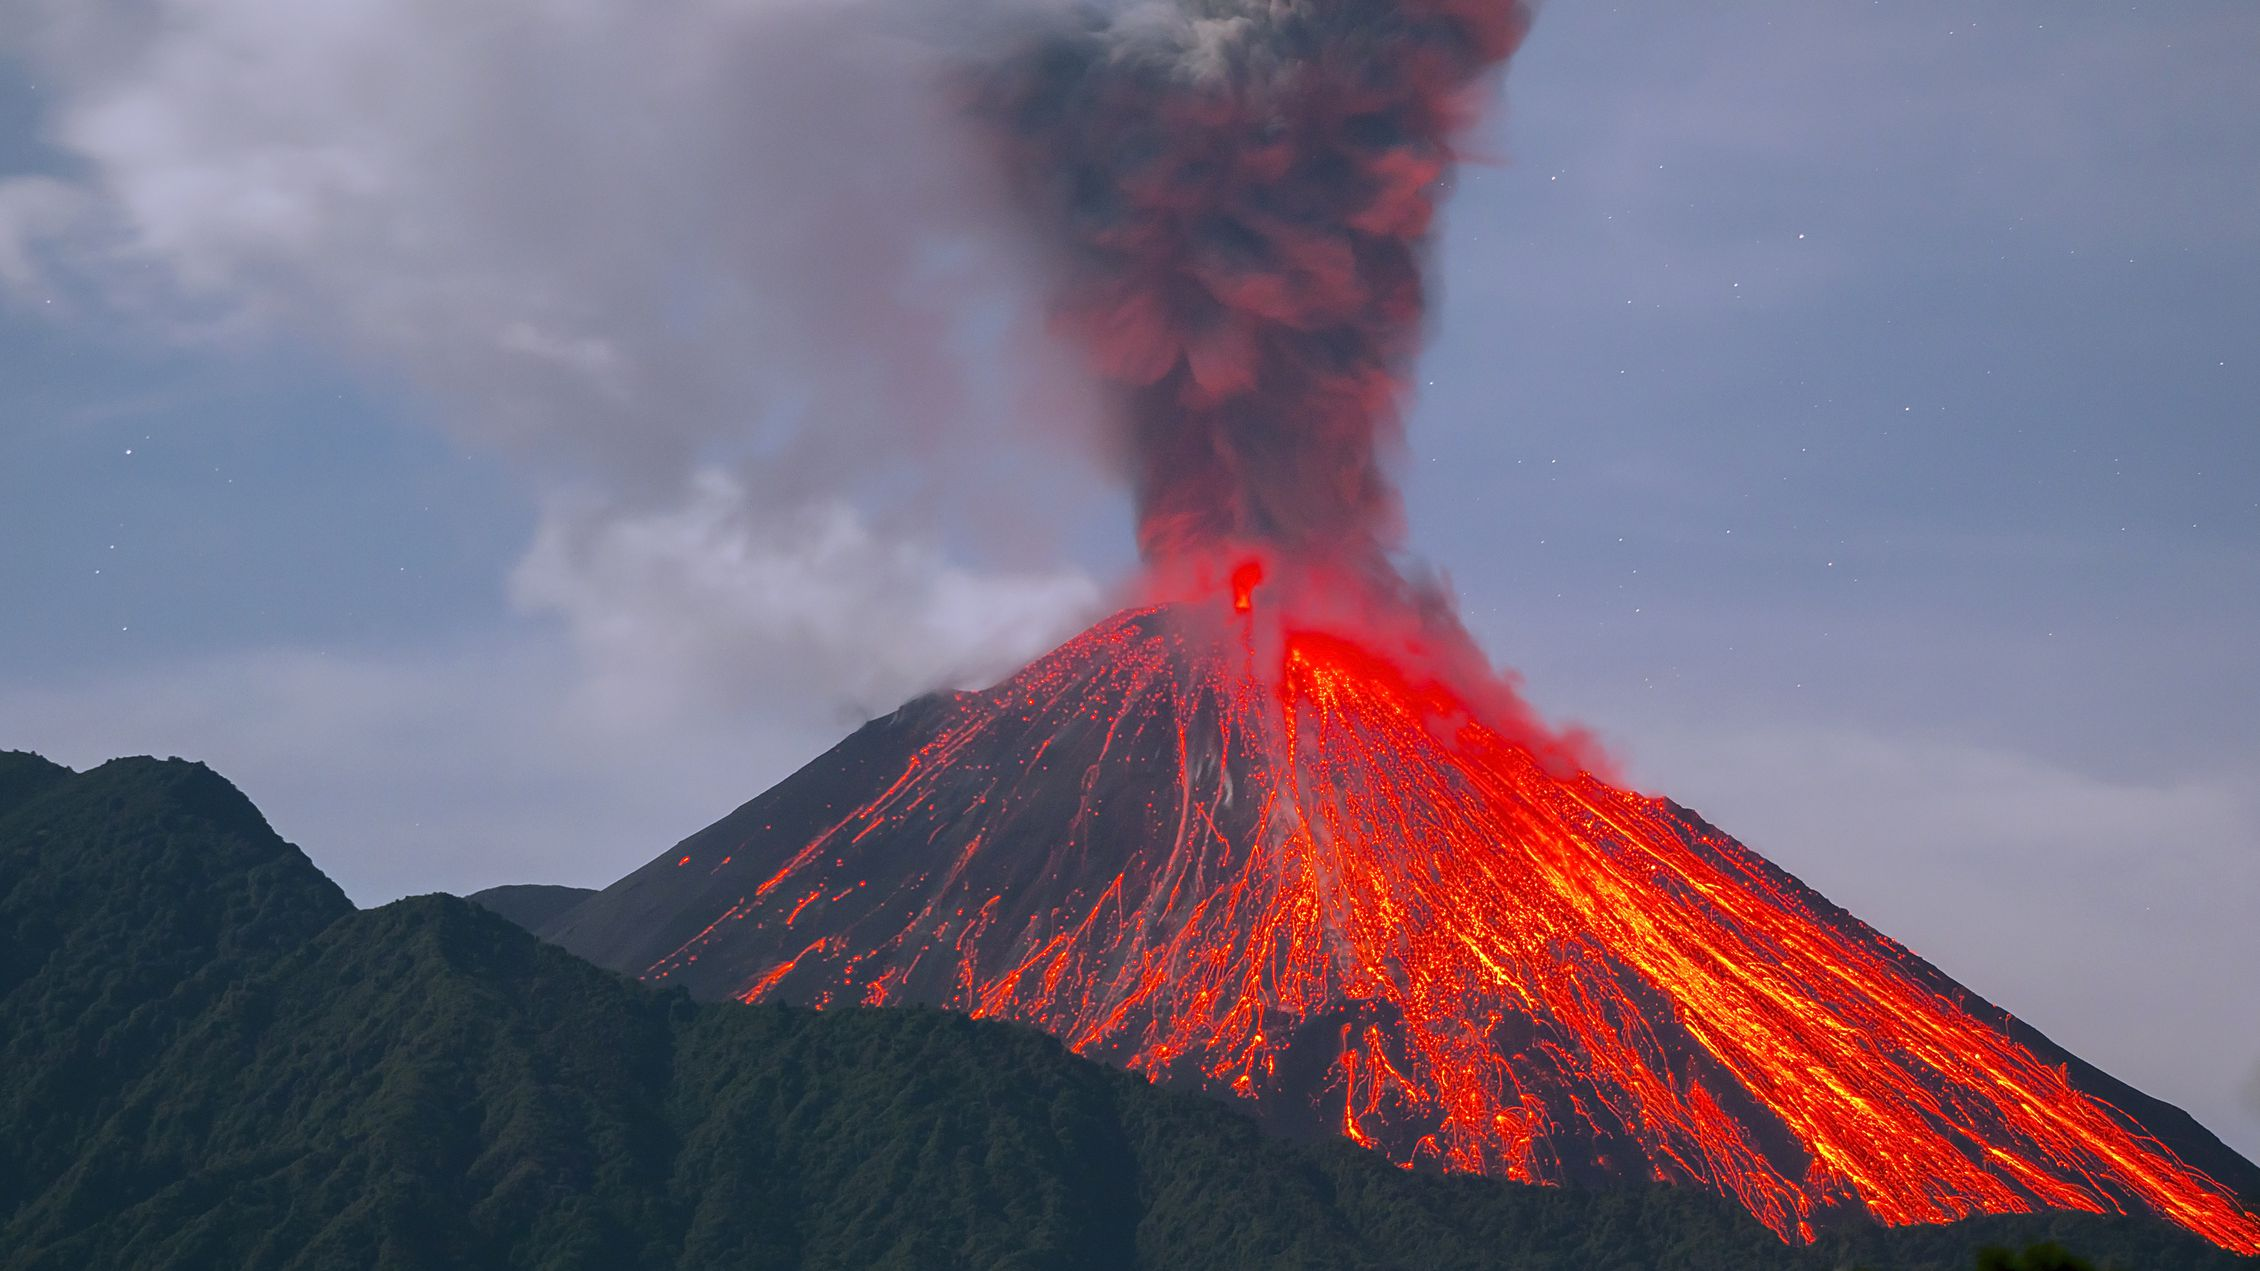

In [93]:
Image(filename='C:/Users/91939/test2/18.JPG', width=300,height=200) 

In [94]:
preprocessed_image = prepare_image('18.JPG')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
predicted_name =  results[0][0][1]
predicted_name

'volcano'